# K Means Color Quantization

## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.image as mpimg # to directly read jpg, png ---> numpy array

## The Image

In [56]:
image_as_array = mpimg.imread('../Data/palm_trees.jpg')
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [57]:
image_as_array.shape # H, W, color channel

(1401, 934, 3)

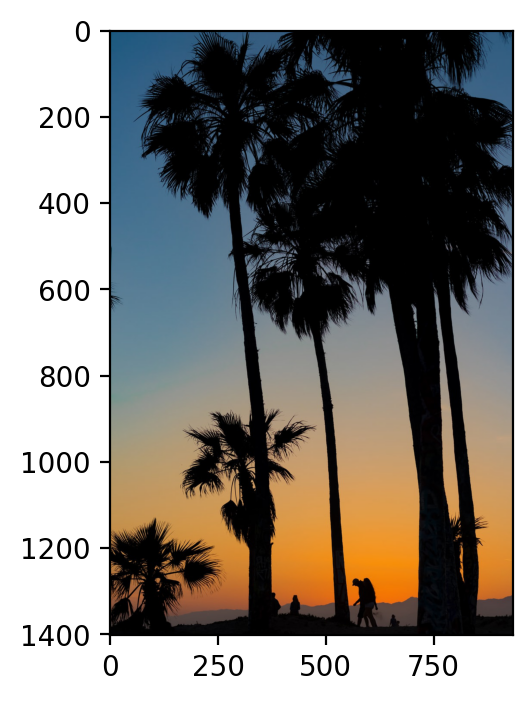

In [58]:
plt.figure(dpi=200)
plt.imshow(image_as_array); # showing numpy array as an image

-------

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

We also ned to reshape the image first.
#### (H, W, C) ====> 2D (H*W, C)

In [13]:
image_as_array.shape # (h,w,3 color channels)

(1401, 934, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using formula:  (h,w,c) ---> (h * w,c)

In [16]:
(h, w, c) = image_as_array.shape

h, w, c

(1401, 934, 3)

In [17]:
image_as_array_2d = image_as_array.reshape(h*w, c)

In [19]:
image_as_array_2d.shape # now becoming 2D array from original 3D array

(1308534, 3)

## Creating model and training

In [61]:
from sklearn.cluster import KMeans

In [62]:
model = KMeans(n_clusters=6)

# we want to quantize / reduce the number of colors to 6

In [63]:
labels =  model.fit_predict(image_as_array_2d)

In [64]:
labels # the labels are the clusters group

array([0, 0, 0, ..., 1, 1, 1])

If the image is too large, we might want to sample only a portion of the image to perform KMeans on it.

In [65]:
model.cluster_centers_

# THESE ARE THE 6 RGB COLOR CODES!
# There are 6 centers as we are reducing to 6 colors as we specified as in number of k.
# There are 3 channel for each center.

array([[ 71.01390661, 109.19748658, 137.64887954],
       [  2.75599649,   2.57498121,   3.70000713],
       [191.17885134, 154.5272533 , 109.95523309],
       [218.97345335, 135.5984951 ,  47.33849616],
       [ 67.25979522,  61.52529474,  61.97277973],
       [136.49890657, 143.66269893, 144.03751759]])

In [66]:
model.cluster_centers_.shape # 6 centers with 3 channels for each one

(6, 3)

In [49]:
model.cluster_centers_[0]

array([208.36672362, 153.84897441,  88.23075463])

As the value are in decimal, we will round them up.

In [70]:
rgb_codes = model.cluster_centers_.round(0).astype(int)
rgb_codes

array([[ 71, 109, 138],
       [  3,   3,   4],
       [191, 155, 110],
       [219, 136,  47],
       [ 67,  62,  62],
       [136, 144, 144]])

In [71]:
labels

array([0, 0, 0, ..., 1, 1, 1])

If we think about it, labels and rgb_codes have association. 

Lables are the clusters that model predicted. 

So each RBG code is associated to specific cluster. They are just the index number of which RGB code (Center Points) the specific data point is belonged to.

In [72]:
rgb_codes[labels]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

Basically each data point (RGB) is assigned to specific cluster.

In [69]:
image_as_array_2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

Now we will break each RGB value back to each channel.

In [74]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

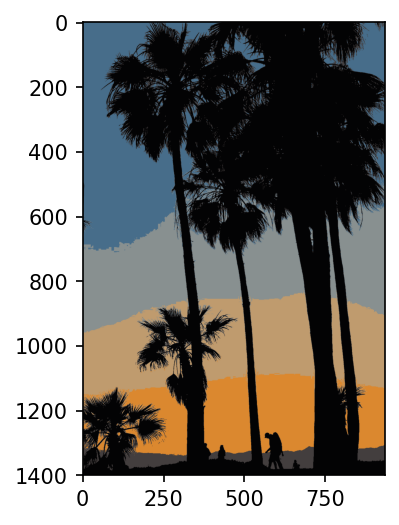

In [75]:
plt.figure(dpi=150)
plt.imshow(quantized_image);